# Image representation and filtering using python.


### Task 0: Reprenseting Figures

In [1]:
#Matplotlib is a useful plotting library for python
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import matplotlib.image as mpimg
import cv2 
# This code is to make matplotlib figures appear inline in the notebook rather than in a new window.
%matplotlib inline

# set default size of plots
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In this part, you will load some images and do some operations on them. At the end of this part, please create a new python file `imageMain.py` and copy all of your implemented functions in that file to use them in your future assignments and project. In your submission, include this updated notebook, a PDF of this notebook, and imageMain.py.

## Question 1 (5 points)
Implement the readImage method and call the displayImage method implemented below. We will use these two methods through the rest of the notebook to visualize our work.

In [2]:
# Run this code to set the locations of the images we will be using. 
# You can change these paths to point to your own images if you want to try them out for fun.


image_path = './image1.jpg'


def displayImage(img):
    # Show image
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
def readImage(imagePath):
    # Your code here
    return mpimg.imread(imagePath)

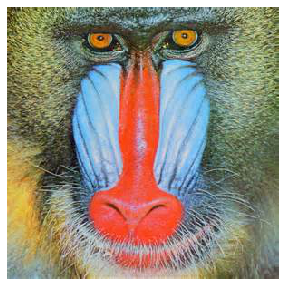

(300, 300, 3)


In [3]:
image = readImage(image_path)

displayImage(image)

print(image.shape)


## Question 2 (5 points)
Implement the convertColor method and convert the image into grayscale and binary.

In [4]:
def convertColor(image, targetColor):
    # Your code here
    gray = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])
    if(targetColor == 'BW'):
        binary = gray
        binary[binary < (255/2)] = 0
        binary[binary > (255/2)] = 1


        # height, width, channels = image.shape
        # binary = np.zeros((height,width,1))
        # img_grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # (thresh, binary) = cv2.threshold(img_grayscale, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        return binary 
    else:
        # gray = cv2.cvtColor(image, cv.COLOR_RGB2GRAY)
        return gray

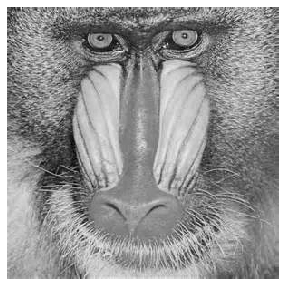

(300, 300)


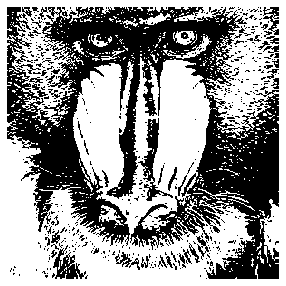

In [5]:
# convert image from RGB to greyscale
gray_img = convertColor(image, 'gray')
displayImage(gray_img)
print(gray_img.shape)

# convert image from RGB to binary
bw_img = convertColor(image, 'BW')
displayImage(bw_img)

## Question 3 (10 points)
Implement the `rgb_exclusion()`, in which the input image is decomposed into the three channels: R, G and B and return the image excluding the specified channel. 

In [6]:
def rgb_exclusion(image, channelToExclude):
    # Your code here
    
    # since in OpenCV docs says:"Warning cv2.split() is a costly operation (in terms of time). 
    # So do it only if you need it. Otherwise go for Numpy indexing."

    c = 0
    if (channelToExclude == "G"):
        c = 1
    elif(channelToExclude == "B"):
        c = 2
    image = np.array(image)
    image[:,:,c] = 0
    return image

Below is the image without the red channel.


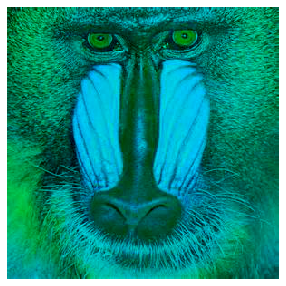

Below is the image without the green channel.


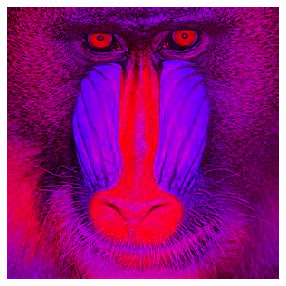

Below is the image without the blue channel.


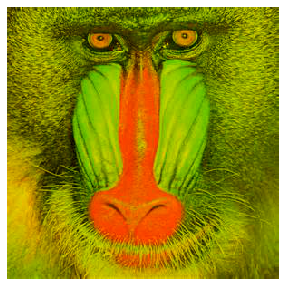

In [7]:
without_red = rgb_exclusion(image, 'R')
without_blue = rgb_exclusion(image, 'B')
without_green = rgb_exclusion(image, 'G')

print("Below is the image without the red channel.")
displayImage(without_red)

print("Below is the image without the green channel.")
displayImage(without_green)

print("Below is the image without the blue channel.")
displayImage(without_blue)

## Question 4 (10 points)
Implement the hsv_decomposition, in which the input image is decomposed into the three channels: H, S and V and return the values for the specified channel. 

In [8]:
def hsv_decomposition(image, channelToInclude):
    # Your code here

    # # convert rgb to hsv
    # image = image.astype('float')
    # maxv = np.amax(image, axis=2)
    # maxc = np.argmax(image, axis=2)
    # minv = np.amin(image, axis=2)
    # minc = np.argmin(image, axis=2)

    # hsv = np.zeros(image.shape, dtype='float')
    # hsv[maxc == minc, 0] = np.zeros(hsv[maxc == minc, 0].shape)
    # hsv[maxc == 0, 0] = (((image[..., 1] - image[..., 2]) * 60.0 / (maxv - minv + np.spacing(1))) % 360.0)[maxc == 0]
    # hsv[maxc == 1, 0] = (((image[..., 2] - image[..., 0]) * 60.0 / (maxv - minv + np.spacing(1))) + 120.0)[maxc == 1]
    # hsv[maxc == 2, 0] = (((image[..., 0] - image[..., 1]) * 60.0 / (maxv - minv + np.spacing(1))) + 240.0)[maxc == 2]
    # hsv[maxv == 0, 1] = np.zeros(hsv[maxv == 0, 1].shape)
    # hsv[maxv != 0, 1] = (1 - minv / (maxv + np.spacing(1)))[maxv != 0]
    # hsv[..., 2] = maxv


    image = image.astype('float')
    norm = np.linalg.norm(image)
    normal_image = image/norm
    hsv = matplotlib.colors.rgb_to_hsv(normal_image)

    #include just one channel
    c = 0
    if (channelToInclude == "S"):
        c = 1
    elif(channelToInclude == "V"):
        c = 2
    hsv = hsv[:,:,c] 

    # #convert hsv to rgb 
    # hi = np.floor(hsv[..., 0] / 60.0) % 6
    # hi = hi.astype('uint8')
    # v = hsv[..., 2].astype('float')
    # f = (hsv[..., 0] / 60.0) - np.floor(hsv[..., 0] / 60.0)
    # p = v * (1.0 - hsv[..., 1])
    # q = v * (1.0 - (f * hsv[..., 1]))
    # t = v * (1.0 - ((1.0 - f) * hsv[..., 1]))

    # rgb = np.zeros(hsv.shape)
    # rgb[hi == 0, :] = np.dstack((v, t, p))[hi == 0, :]
    # rgb[hi == 1, :] = np.dstack((q, v, p))[hi == 1, :]
    # rgb[hi == 2, :] = np.dstack((p, v, t))[hi == 2, :]
    # rgb[hi == 3, :] = np.dstack((p, q, v))[hi == 3, :]
    # rgb[hi == 4, :] = np.dstack((t, p, v))[hi == 4, :]
    # rgb[hi == 5, :] = np.dstack((v, p, q))[hi == 5, :]

    return hsv


Below is the image with only the H channel.


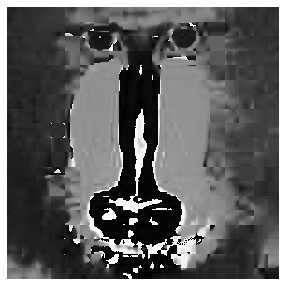

Below is the image with only the S channel.


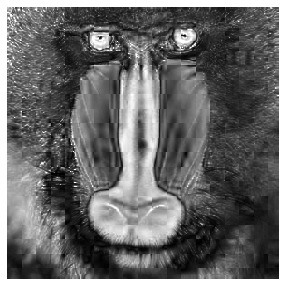

Below is the image with only the V channel.


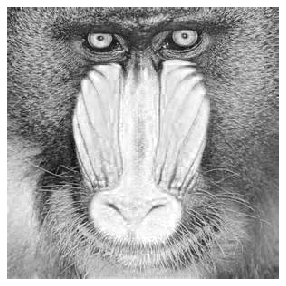

In [9]:
image_h = hsv_decomposition(image, 'H')
image_s = hsv_decomposition(image, 'S')
image_v = hsv_decomposition(image, 'V')

print("Below is the image with only the H channel.")
displayImage(image_h)

print("Below is the image with only the S channel.")
displayImage(image_s)

print("Below is the image with only the V channel.")
displayImage(image_v)

## Question 5 (5 points)
Explain in 2-3 sentences what happens to an image when you take away the H and S channels.
### Answer:
Write your answer here...
>It will be in gray scale since you take away the pure colors (hue channel)
>and the whiteness of each color (saturation channel) 

## Question 6 (20 points)
In this section, you will ransform the image into the frequency domain. In addition, you will compute and display the real, imaginary, magnitude and phase components of the transformed image.  

In [10]:
def fourier_tranformer(image):
    # Your code here

    gray_img = convertColor(image, 'gray')

    TF = np.fft.fft2(gray_img)
    real = np.fft.fftshift(np.real(TF))
    imaginary = np.fft.fftshift(np.imag(TF))
    magnitude = np.log10(np.abs(np.fft.fftshift(TF)))
    phase = np.angle(TF)
    

    
    return real, imaginary, magnitude, phase

This is the real


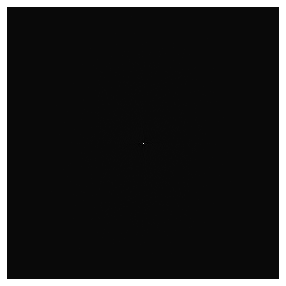

This is the imaginary


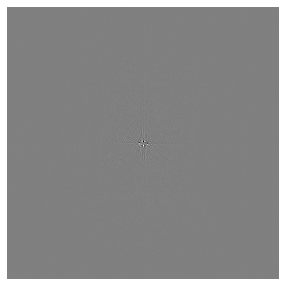

This is the magnitude


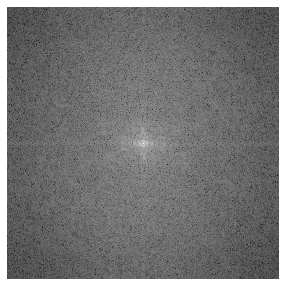

This is the phase


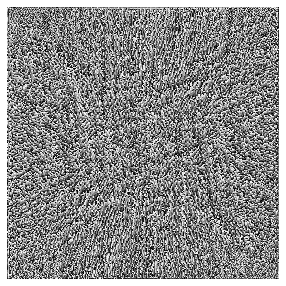

In [11]:
real, imaginary, magnitude, phase = fourier_tranformer(image)

print("This is the real")
displayImage(real)
print("This is the imaginary")
displayImage(imaginary)
print("This is the magnitude")
displayImage(magnitude)
print("This is the phase")
displayImage(phase)

## Question 7 (10 points)
(a) Add salt and pepper noise to the image. Generate two images of the input image by making the gray values of 5% and 10% of the image pixels randomly 0 (black) or 255 (white).


In [12]:
def add_noise_random(image,percent):
    # your code here
    # Getting the dimensions of the image
    import random
    import math
    image = np.array(image)
    row , col = image.shape[:2]
     
    # Randomly pick some pixels in the
    # image for coloring them white
    number_of_pixels = math.floor(row*col*percent/100)
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to white
        image[y_coord][x_coord] = 255
         
    # Randomly pick some pixels in
    # the image for coloring them black
    number_of_pixels = math.floor(row*col*percent/100)
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to black
        image[y_coord][x_coord] = 0
         
    return image

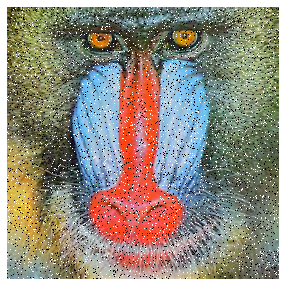

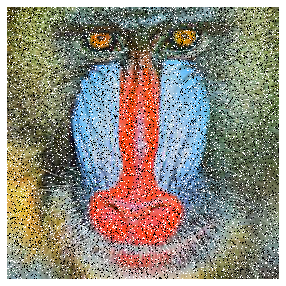

In [13]:
image_saltNoise_5 = add_noise_random(image,5)
displayImage(image_saltNoise_5)

image_saltNoise_10 = add_noise_random(image,10)
displayImage(image_saltNoise_10)

(b) Add Gaussian noise to the image. Use Gaussian noise with segma = 2 and 5 to get two noisy images.


In [14]:
def add_noise_gaussian(image,segma):

    dst= np.empty_like(image)
    # gaussian = np.random.normal(mean, sigma, (image.shape[0],image.shape[1])) 
    noise = cv2.randn(dst,(0,0,0),(segma,segma,segma))
    image = cv2.addWeighted(image,0.5,noise,30,0)


    return image

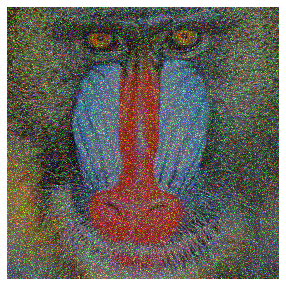

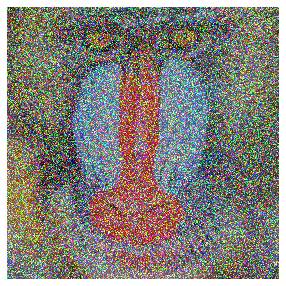

In [15]:
image_gaussianNoise_2 = add_noise_gaussian(image,2)
displayImage(image_gaussianNoise_2)

image_gaussianNoise_5 = add_noise_gaussian(image,5)
displayImage(image_gaussianNoise_5)


## Question 8 (15 points)
Apply average, Gaussian, and median filters of 3 x 3 and 5 x 5 sizes to the images of question 7 (a) and 7 (b) and analyze the results

In [16]:
# Your code here
def apply_filter(image, filter, size):

    # average_blur = cv2.boxFilter(image,-1,(size,size))
    # median_blur = cv2.medianBlur(image, size)
    # gaussian_blur = cv2.GaussianBlur(image,(5,5),cv2.BORDER_DEFAULT)

    if (filter=="gaussian"):
        image = cv2.GaussianBlur(image,(5,5),cv2.BORDER_DEFAULT)
    elif (filter == "average"):
        image = cv2.boxFilter(image,-1,(size,size))
    elif (filter == "median"):
        image = cv2.medianBlur(image, size)

    return image

Below is the image_gaussianNoise_2 with gaussian filter with size 3


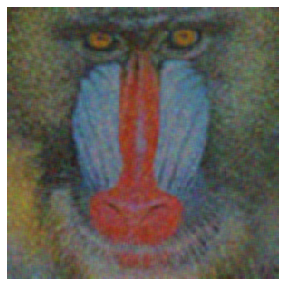

Below is the image_gaussianNoise_2 with gaussian filter with size 5


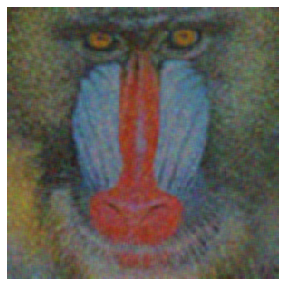

Below is the image_gaussianNoise_5 with gaussian filter with size 3


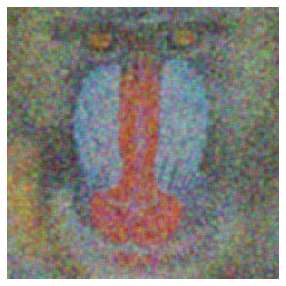

Below is the image_gaussianNoise_5 with gaussian filter with size 5


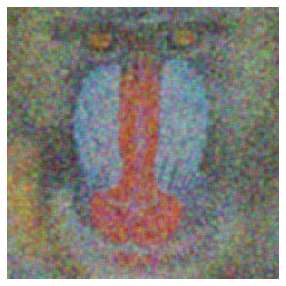

Below is the image_saltNoise_5 with gaussian filter with size 3


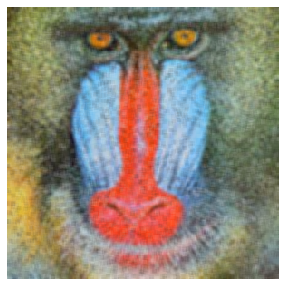

Below is the image_saltNoise_5 with gaussian filter with size 5


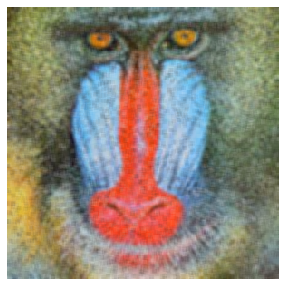

Below is the image_saltNoise_10 with gaussian filter with size 3


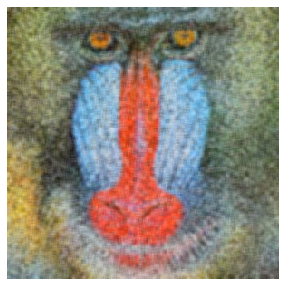

Below is the image_saltNoise_10 with gaussian filter with size 5


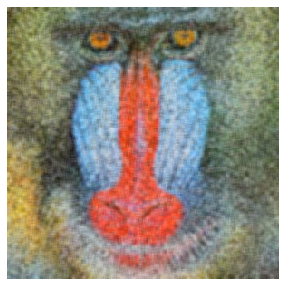

Below is the image_gaussianNoise_2 with average filter with size 3


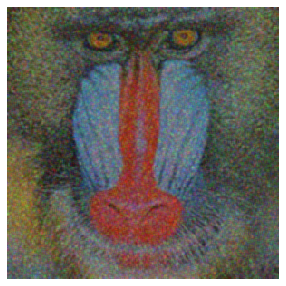

Below is the image_gaussianNoise_2 with average filter with size 5


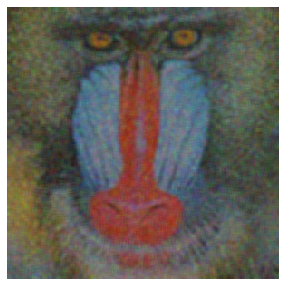

Below is the image_gaussianNoise_5 with average filter with size 3


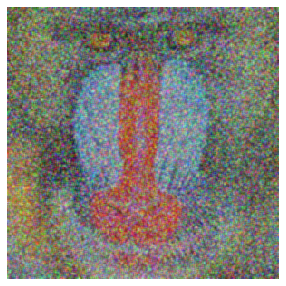

Below is the image_gaussianNoise_5 with average filter with size 5


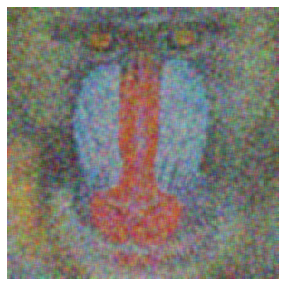

Below is the image_saltNoise_5 with average filter with size 3


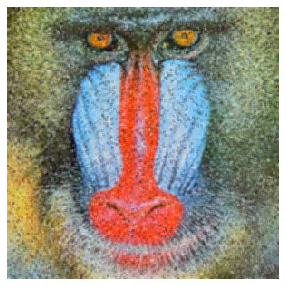

Below is the image_saltNoise_5 with average filter with size 5


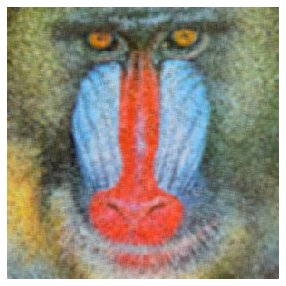

Below is the image_saltNoise_10 with average filter with size 3


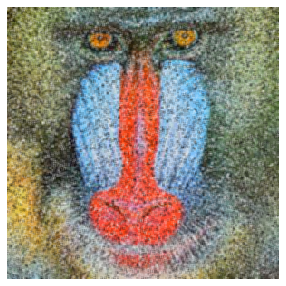

Below is the image_saltNoise_10 with average filter with size 5


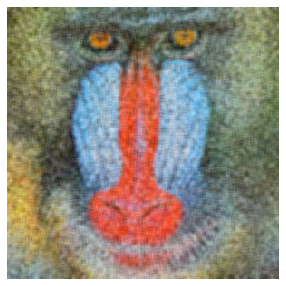

Below is the image_gaussianNoise_2 with median filter with size 3


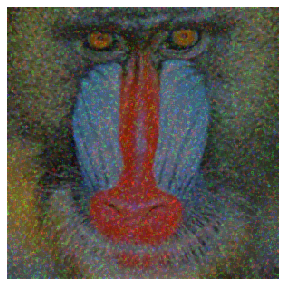

Below is the image_gaussianNoise_2 with median filter with size 5


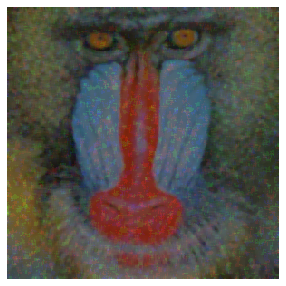

Below is the image_gaussianNoise_5 with median filter with size 3


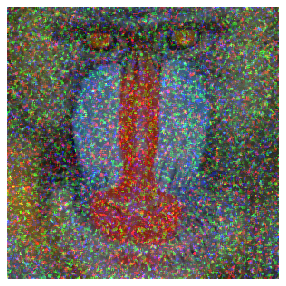

Below is the image_gaussianNoise_5 with median filter with size 5


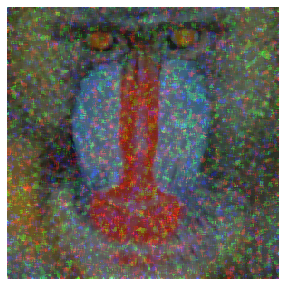

Below is the image_saltNoise_5 with median filter with size 3


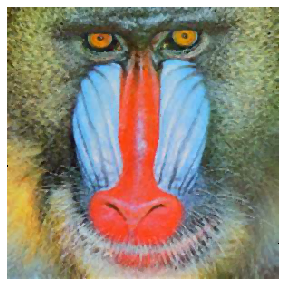

Below is the image_saltNoise_5 with median filter with size 5


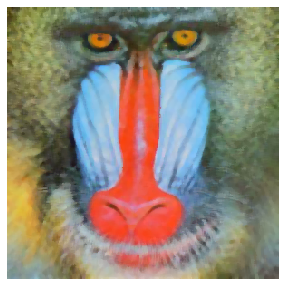

Below is the image_saltNoise_10 with median filter with size 3


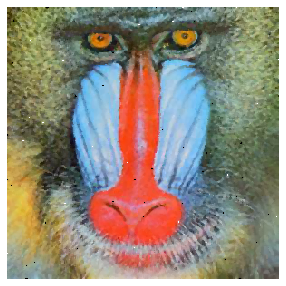

Below is the image_saltNoise_10 with median filter with size 5


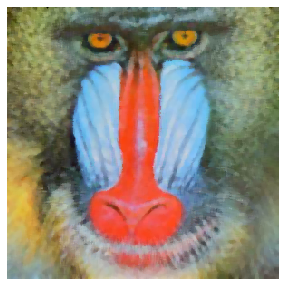

In [17]:
filters = ["gaussian","average","median"]
kernals_size=[3,5]
image_gaussianNoise_2 = add_noise_gaussian(image,2)
image_gaussianNoise_5 = add_noise_gaussian(image,5)
image_saltNoise_5 = add_noise_random(image,5)
image_saltNoise_10 = add_noise_random(image,10)
noise_images = {"image_gaussianNoise_2":image_gaussianNoise_2,
    "image_gaussianNoise_5":image_gaussianNoise_5,
    "image_saltNoise_5":image_saltNoise_5,
    "image_saltNoise_10":image_saltNoise_10}


for filter in filters:
    for i in noise_images:
        for k_size in kernals_size:
            print("Below is the", i , "with",filter, "filter with size",k_size)
            filtered_image = apply_filter(noise_images[i], filter,k_size)
            displayImage(filtered_image)

### Analyzing the results 
1. If we apply filters on noise image it will be denoised (remove the noise)
2. increasing the size of the filter led to increase the blur of the image
3. The best filter for gaussain noise (with our parameters) is median 
4. The best filter for salt noise (with our parameters) is median  

## Question 9 (20 points)
Enhance image2 to increase the brightness of bright regions and increase the darkness of other regions, then display the enhanced image.

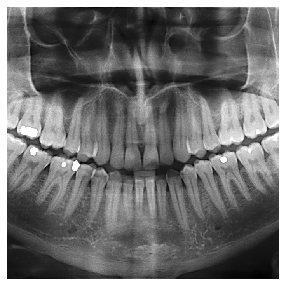

In [18]:
# Your code here
image_path = './image2.jpg'
image2 = readImage(image_path)
displayImage(image2)

In [19]:
def increase_brightness(img, value=20):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] -= value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

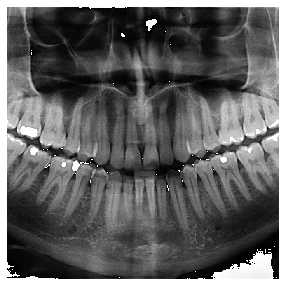

In [20]:
image = increase_brightness(image2)
displayImage(image)

In [21]:
!export PATH=/Library/TeX/texbin:$PATH

'export' is not recognized as an internal or external command,
operable program or batch file.


In [22]:
!jupyter nbconvert imageMain.ipynb --to pdf

[NbConvertApp] Converting notebook imageMain.ipynb to pdf
[NbConvertApp] Support files will be in imageMain_files\
[NbConvertApp] Making directory .\imageMain_files
[NbConvertApp] Making directory .\imageMain_files
[NbConvertApp] Making directory .\imageMain_files
[NbConvertApp] Making directory .\imageMain_files
[NbConvertApp] Making directory .\imageMain_files
[NbConvertApp] Making directory .\imageMain_files
[NbConvertApp] Making directory .\imageMain_files
[NbConvertApp] Making directory .\imageMain_files
[NbConvertApp] Making directory .\imageMain_files
[NbConvertApp] Making directory .\imageMain_files
[NbConvertApp] Making directory .\imageMain_files
[NbConvertApp] Making directory .\imageMain_files
[NbConvertApp] Making directory .\imageMain_files
[NbConvertApp] Making directory .\imageMain_files
[NbConvertApp] Making directory .\imageMain_files
[NbConvertApp] Making directory .\imageMain_files
[NbConvertApp] Making directory .\imageMain_files
[NbConvertApp] Making directory .\i